In [1]:
from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.''')
display(tag)

In [2]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

%matplotlib notebook
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal
import ipywidgets as widgets
import control as c
import sympy as sym
from IPython.display import Latex, display, Markdown # For displaying Markdown and LaTeX code
from fractions import Fraction
import matplotlib.patches as patches

## Sistemi del primo ordine senza zeri

### Introduzione

I sistemi del primo ordine senza zeri sono caratterizzati dalla seguente funzione di trasferimento:

\begin{equation}
    G(s)=\frac{k}{s+k}.
\end{equation}

Il valore $k$ è importante poiché definisce i seguenti parametri:
- $1/k$ indica la *costante di tempo* della risposta, che definisce il tempo necessario affinché la risposta al gradino raggiunga $\approx$ il 63% del suo valore finale.
- $t_r$ indica il *tempo di salita*, ovvero il tempo necessario affinché la risposta del sistema passi dal 10 \% al 90 \% del valore di regime.
- $t_s$ indica il *tempo di assestamento*, ovvero l'istante per cui la risposta del sistema entra all'interno della banda di errore (es.2 \% come impostato nell'esempio sotto) senza più uscirne.

La risposta al gradino di questi sistemi è data da:

\begin{equation}
    c(t)=1-e^{-at},
\end{equation}

dove la risposta forzata è uguale a $1$ e la risposta libera a $-e^{-at}$.

---

### Come usare questo notebook?

Sposta lo slider per definire il valore $k$ nella funzione di trasferimento del sistema del primo ordine $G(s)=\frac{k}{s+k}$ e osserva la risposta al gradino del sistema definito.

<IPython.core.display.Javascript object>


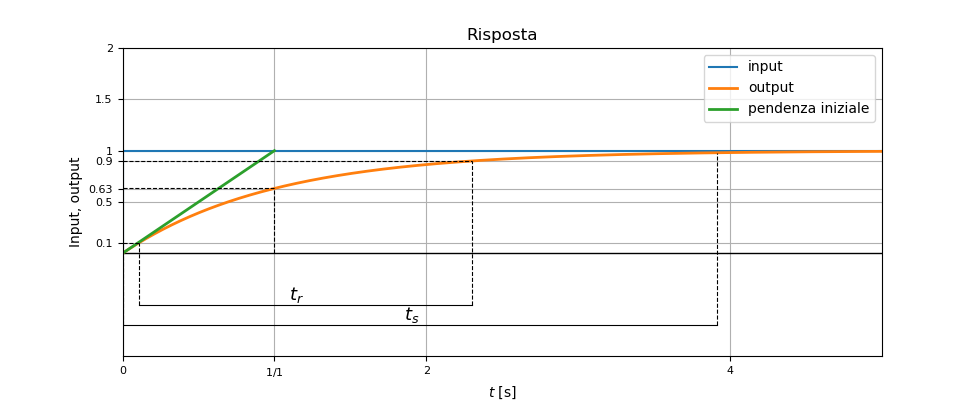

interactive(children=(IntSlider(value=1, description='k', max=5, min=1), Output()), _dom_classes=('widget-inte…

In [6]:
# set up plot
fig, ax = plt.subplots(figsize=[9.8,4],num='Sistema del primo ordine')
ax.set_ylim([-1, 2])
ax.set_xlim([0, 5])
ax.grid(True)
ax.set_title ('Risposta')
ax.set_xlabel('$t$ [s]')
ax.set_ylabel('Input, output')
xaxis = ax.axhline(y=0,color='k',lw=1)

response, = ax.plot([], [])
slope, = ax.plot([], [])
x1a, = ax.plot([], [])
y1a, = ax.plot([], [])
tr11, = ax.plot([], [])
trv1, = ax.plot([], [])
trv2, = ax.plot([], [])
trh1, = ax.plot([], [])
trh2, = ax.plot([], [])
ts11, = ax.plot([], [])
ts1, = ax.plot([], [])
ts2, = ax.plot([], [])
texttr=ax.text(0,0,'')
textts=ax.text(0,0,'')

ax.step([0,5],[0,1],color='C0',label='input')

# generate x values
t = np.linspace(0, 2 * np.pi, 10000)
  
def response_func(t, k):
    """"Return response function"""
    return 1-np.exp(-k*t)

@widgets.interact(k=(1, 5, 1))


def update(k=1):
    """Remove old lines from plot and plot new one"""
    global response,slope,x1a,y1a,tr11,trv1,trv2,trh1,trh2,ts11,ts1,ts2,texttr,textts
    ax.lines.remove(response)
    ax.lines.remove(slope)
    ax.lines.remove(x1a)
    ax.lines.remove(y1a)
    ax.lines.remove(tr11)
    ax.lines.remove(trv1)
    ax.lines.remove(trv2)
    ax.lines.remove(trh1)
    ax.lines.remove(trh2)
    ax.lines.remove(ts11)
    ax.lines.remove(ts1)
    ax.lines.remove(ts2)
    texttr.remove()
    textts.remove()
    response, = ax.plot(t, response_func(t,k), color='C1',lw=2)
    response.set_label('output')
    slope, = ax.plot([0,1/k], [0,1], color='C2',lw=2)
    slope.set_label('pendenza iniziale')
    x1a, = ax.plot([1/k,1/k],[0,1-np.exp(-1)],'--',color='k',lw=.8)
    y1a, = ax.plot([0,1/k],[1-np.exp(-1),1-np.exp(-1)],'--',color='k',lw=.8)
# rise time
    tr11, = ax.plot([-np.log(0.9)/k,-np.log(0.1)/k],[-0.5,-0.5],color='k',lw=.8)
    trv1, = ax.plot([-np.log(0.9)/k,-np.log(0.9)/k],[-0.5,0.1],'--',color='k',lw=.8)
    trv2, = ax.plot([-np.log(0.1)/k,-np.log(0.1)/k],[-0.5,0.9],'--',color='k',lw=.8)
    trh1, = ax.plot([0,-np.log(0.9)/k],[0.1,0.1],'--',color='k',lw=.8)
    trh2, = ax.plot([0,-np.log(0.1)/k],[0.9,0.9],'--',color='k',lw=.8)
# settling time
    ts11, = ax.plot([0,-np.log(0.02)/k],[-0.7,-0.7],color='k',lw=.8)
    ts1, = ax.plot([0,0],[-0.7,0],'--',color='k',lw=.8)
    ts2, = ax.plot([-np.log(0.02)/k,-np.log(0.02)/k],[-0.7,0.98],'--',color='k',lw=.8)
    ax.legend()
    texttr=ax.text((-np.log(0.1)/k-(-np.log(0.9)/k))/2,-0.45, '$t_r$',fontsize=13)
    textts=ax.text((-np.log(0.02)/k)/2-0.1,-0.65, '$t_s$',fontsize=13)

    plt.xticks([0,1/k,2,4], [0,'${1}/{%s}$'%k,2,4],fontsize=8)
    plt.yticks([0.1,0.5,0.63,0.9,1,1.5,2], [0.1,0.5,0.63,0.9,1,1.5,2],fontsize=8)
    
    num1=[k]
    den1=[1,k]
    display(Markdown('La funzione di trasferimento del sistema $G(s)$ è uguale a:'))
    tf_sys1=c.TransferFunction(num1,den1)
    s=sym.Symbol('s')
    eq=(k/(s+k))
    display(eq)

## Sistemi del secondo ordine

### Introduzione

Differentemente dai sistemi del primo ordine presentati sopra, in cui il parametro $k$ influenza solo la velocità della risposta, il cambiamento dei parametri analoghi nei sistemi del secondo ordine possono influenzare la forma effettiva della risposta. In questi sistemi sono possibili le seguenti quattro risposte:
- risposta *sovrasmorzata*,
- risposta *sottosmorzata*,
- risposta *non smorzata* e
- risposta con *smorzamento critico*.

### Come usare questo notebook?

Sposta gli sliders per definire i valori di $a$ e $b$ nella funzione di trasferimento del sistema del secondo ordine dalla forma $G(s)=\frac{b}{s^2+as+b}$ e osserva la mappa poli-zeri e la risposta al gradino del sistema definito.

<IPython.core.display.Javascript object>


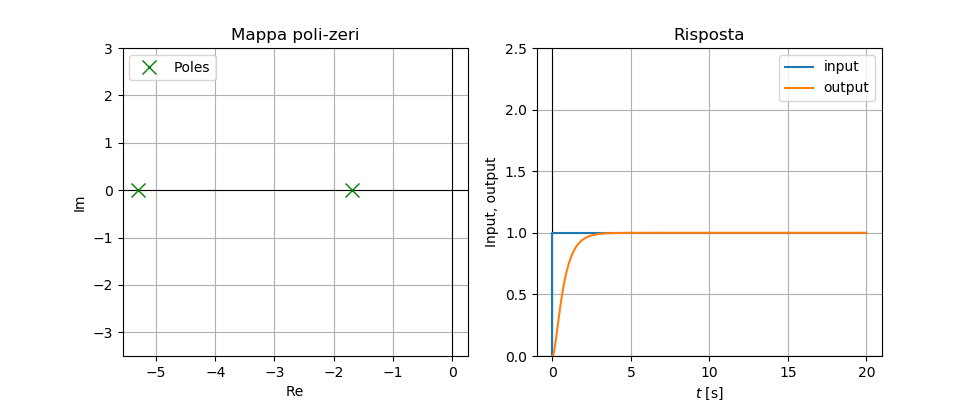

interactive(children=(IntSlider(value=7, description='a', max=10), IntSlider(value=9, description='b', max=10,…

In [8]:
# set up plot
fig1, ax1 = plt.subplots(1,2,figsize=[9.8,4],num='Sistema del secondo ordine')
ax1[0].set_ylim([-3.5, 3])
ax1[1].set_ylim([0, 2.5])
# ax1.set_xlim([0, 5])
ax1[0].grid(True)
ax1[1].grid(True)
ax1[0].axhline(y=0,color='k',lw=.8)
ax1[1].axhline(y=0,color='k',lw=.8)
ax1[0].axvline(x=0,color='k',lw=.8)
ax1[1].axvline(x=0,color='k',lw=.8)
ax1[0].set_xlabel('Re')
ax1[0].set_ylabel('Im')
ax1[1].set_xlabel('$t$ [s]')
ax1[1].set_ylabel('Input, output')
ax1[0].set_title('Mappa poli-zeri')
ax1[1].set_title('Risposta')

t = np.linspace(0, 20, 10000)

textGs = ax1[0].text(0,0,'')

ax1[1].step([0,20],[0,1],color='C0',label='input')

plotzero, = ax1[0].plot([], [])
response2, = ax1[1].plot([], [])

def response_func2(t, a, b):
    num_sys=np.array([b])
    den_sys=np.array([1,a,b])
    tf_sys=c.TransferFunction(num_sys,den_sys)
    poles_sys,zeros_sys=c.pzmap(tf_sys, Plot=False)
    T, yout = c.step_response(tf_sys,t)
    return T, yout, poles_sys, tf_sys
 
@widgets.interact(a=(0, 10, 1),b=(1,10,1))

def update(a=7,b=9):
    """ Update plots """
    global response2, plotzero, textGs
    ax1[0].lines.remove(plotzero)
    ax1[1].lines.remove(response2)
#     textGs.remove()
    T, yout, poles_sys, tf_sys = response_func2(t, a, b)
    plotzero, = ax1[0].plot(np.real(poles_sys), np.imag(poles_sys), 'xg', markersize=10, label = 'Poles')
#     textGs = ax1[0].text(-7,1,tf_sys)
    response2, = ax1[1].plot(T,yout,color='C1',label='output')
    s=sym.Symbol('s')
    eq=b/(s**2+a*s+b)
    coeff = [1,a,b]
    rootsdenom=np.roots(coeff)
    eq2=b/((s-rootsdenom[0])*(s-rootsdenom[1]))
    display(Markdown('La funzione di trasferimento del sistema $G(s)$ è uguale a:'))
    display(eq),display(Markdown('o')),display(eq2)

    if np.imag(poles_sys)[0] == 0 and np.imag(poles_sys)[1] == 0 and np.real(poles_sys)[0] < 0 and np.real(poles_sys)[1] < 0 and np.real(poles_sys)[0]!=np.real(poles_sys)[1]:
        display(Markdown('Il sistema è **sovrasmorzato** in quanto entrambi i poli hanno solamente la parte reale negativa.'))
    elif math.isclose(0, np.imag(poles_sys)[0], abs_tol=10**-6) and math.isclose(0, np.imag(poles_sys)[1], abs_tol=10**-6) and np.real(poles_sys)[1] < 0 and np.real(poles_sys)[0]==np.real(poles_sys)[1]:
        display(Markdown('Il sistema presenta **smorzamento critico** in quanto presenta un polo con molteplicità algebrica 2 con solamente la parte reale negativa.'))
    elif np.real(poles_sys)[0] == 0 and np.real(poles_sys)[1] == 0:
        display(Markdown('Il sistema è **non smorzato** in quanto i poli hanno solamente la parte immaginaria.'))
    elif np.imag(poles_sys)[0] != 0 and np.imag(poles_sys)[1] != 0 and np.real(poles_sys)[0] != 0 and np.real(poles_sys)[1] != 0:
        display(Markdown('Il sistema è **sottosmorzato**.'))
    ax1[0].legend()
    ax1[1].legend()